In [17]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
from skimage.io import imread
from skimage.util import montage
from tqdm import tqdm
tqdm.pandas() # hack progressbars into pandas
montage_rgb = lambda x, **kwargs: np.stack([montage(x[:, :, :, i], **kwargs) for i in range(x.shape[3])], -1)

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [9]:
datadir = Path('/content/drive/MyDrive/09_Thinkful/03_Capstone-Projects/04_Final_Capstone/satellite-images-of-hurricane-damage')
harvey = pd.DataFrame({'path': list(datadir.glob('**/*.jp*g'))})
harvey.head()

,path
0,/content/drive/MyDrive/09_Thinkful/03_Capstone...
1,/content/drive/MyDrive/09_Thinkful/03_Capstone...
2,/content/drive/MyDrive/09_Thinkful/03_Capstone...
3,/content/drive/MyDrive/09_Thinkful/03_Capstone...
4,/content/drive/MyDrive/09_Thinkful/03_Capstone...


In [10]:
harvey['damage'] = harvey['path'].map(lambda x: x.parent.stem)
harvey['data_split'] = harvey['path'].map(lambda x: x.parent.parent.stem)
harvey['location'] = harvey['path'].map(lambda x: x.stem)
harvey['lat'] = harvey['location'].map(lambda x: float(x.split('_')[0]))
harvey['lon'] = harvey['location'].map(lambda x: float(x.split('_')[-1]))
harvey.sample(3)

,path,damage,data_split,location,lat,lon
3756,/content/drive/MyDrive/09_Thinkful/03_Capstone...,damage,train_another,-95.55471999999999_29.76165,-95.554720,29.761650
20329,/content/drive/MyDrive/09_Thinkful/03_Capstone...,no_damage,test_another,-95.07559499999999_30.030428999999998,-95.075595,30.030429
14459,/content/drive/MyDrive/09_Thinkful/03_Capstone...,damage,test_another,-95.597949_29.762234000000003,-95.597949,29.762234


##Playing around with Geopandas

In [11]:
! pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 15.4 MB 35 kB/s 
     |████████████████████████████████| 6.6 MB 51.6 MB/s 


In [12]:
geo_data = gpd.GeoDataFrame(harvey, geometry=gpd.points_from_xy(harvey.lat, harvey.lon))

In [13]:
geo_data = geo_data.set_crs(epsg=3663)

In [14]:
geo_data.sample()

,path,damage,data_split,location,lat,lon,geometry
2825,/content/drive/MyDrive/09_Thinkful/03_Capstone...,damage,train_another,-95.333301_29.389322999999997,-95.333301,29.389323,POINT (-95.33330 29.38932)


In [15]:
gpd.datasets.available

['naturalearth_lowres', 'naturalearth_cities', 'nybb']

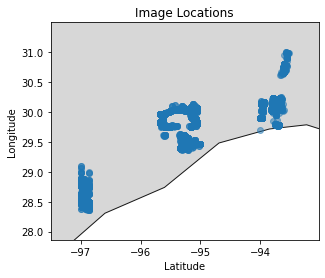

In [18]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

# restricting to usa
ax = world[world.name=='United States of America'].plot(color='lightgrey', edgecolor='black', alpha=.9)

# adding datapoints from harvey dataset onto map
geo_data.plot(ax=ax, alpha=0.5)
minx, miny, maxx, maxy = geo_data.total_bounds
plt.title('Image Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.set_xlim(minx-0.5, maxx+0.5)
ax.set_ylim(miny-0.5, maxy+0.5)
plt.show()

need to add more detailed basemap to plot above


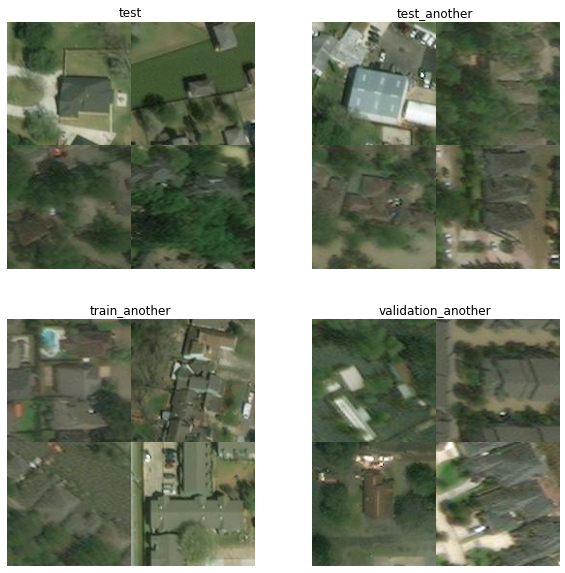

In [21]:
fig, m_axs = plt.subplots(2, 2, figsize=(10, 10))
for c_ax, (c_cat, c_rows) in zip(m_axs.flatten(), harvey.groupby(['data_split'])):
    img_stack = np.stack(c_rows.sample(4)['path'].map(imread), axis=0)
    c_ax.imshow(montage_rgb(img_stack))
    c_ax.set_title(c_cat)
    c_ax.axis('off')

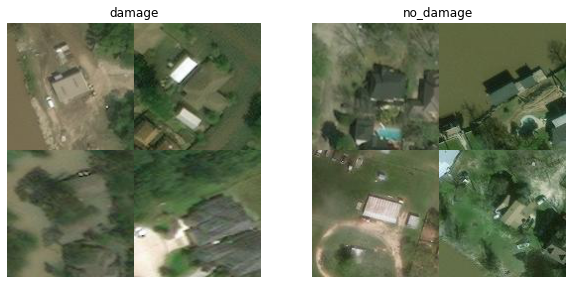

In [22]:
fig, m_axs = plt.subplots(1, 2, figsize=(10, 10))
for c_ax, (c_cat, c_rows) in zip(m_axs.flatten(), harvey.groupby(['damage'])):
    img_stack = np.stack(c_rows.sample(4)['path'].map(imread), axis=0)
    c_ax.imshow(montage_rgb(img_stack))
    c_ax.set_title(c_cat)
    c_ax.axis('off')

In [5]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.5.0


In [7]:
import pathlib
file_path = '/content/drive/MyDrive/09_Thinkful/03_Capstone-Projects/04_Final_Capstone/satellite-images-of-hurricane-damage/train_another'
train_dir = tf.keras.utils.get_file(file_path, fname='train_another')

train_dir = pathlib.Path(data_dir)

TypeError: ignored